In [2]:
import os
import csv
import numpy as np
import pickle
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [3]:
def read_file(run,dataset_name,influence_type,at_type):
        
    if at_type == '1':
        parent_dir = '/home/amanmoha/influence_attack/results/actual/RF/modules/'
    elif at_type == '2':
        parent_dir = '/home/amanmoha/influence_attack/results/actual/RF/modules_ref_tuning/'
    
    directory = 'run'+run+'/'+dataset_name+'/'+influence_type
    path = os.path.join(parent_dir,directory)
    
    with open(path+'/metrics.txt','r') as f:
        lines = f.readlines()
    f.close()
    
    data = []
    for line in lines:
        d_ = line.split('\t')
        data.append(np.round(float(d_[-1].strip(' \n')),3))
    return data

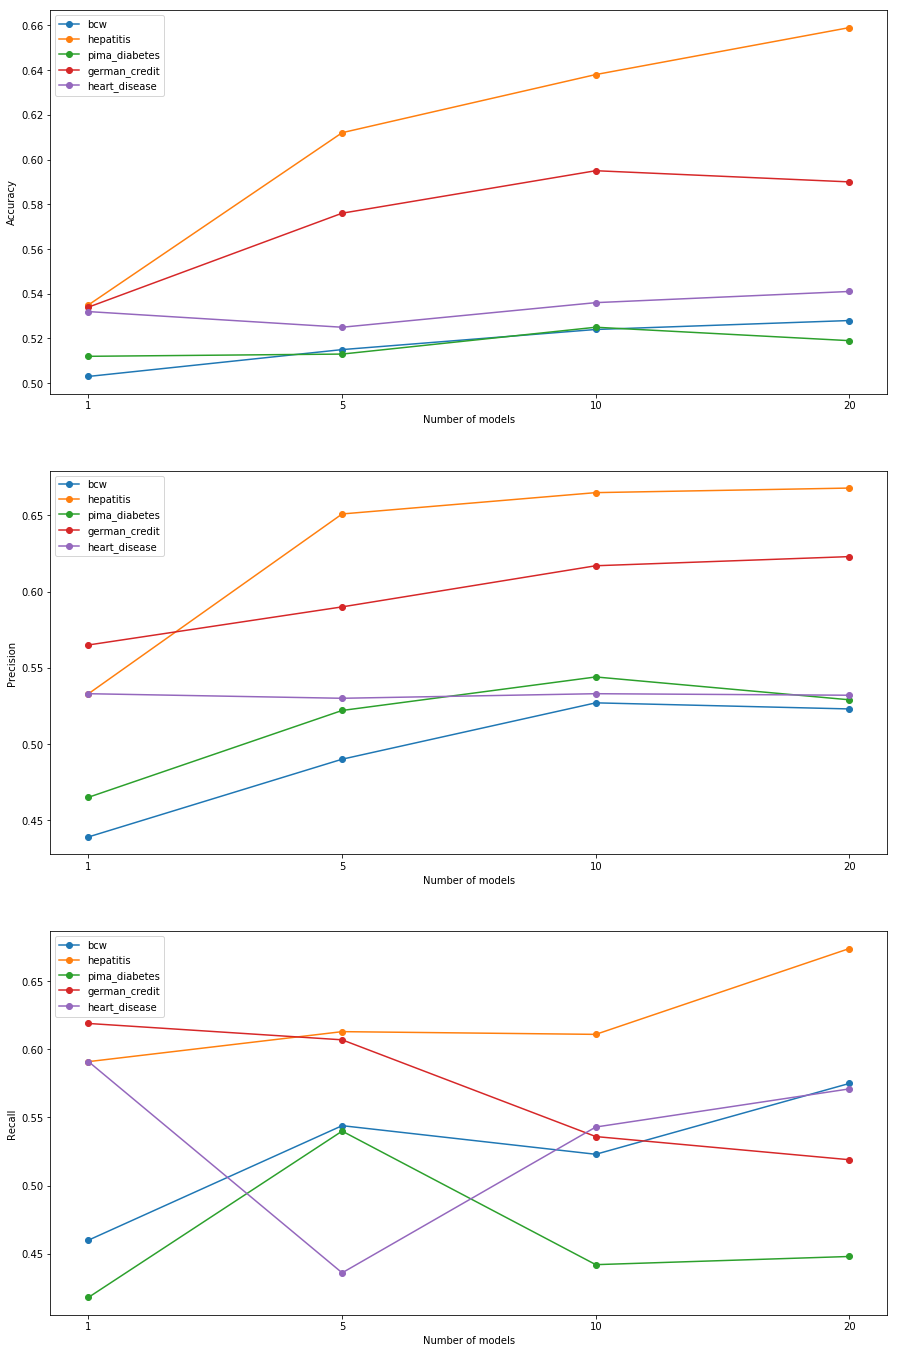

In [61]:
runs = ['2','3','4','1']
dataset_names = ['bcw','hepatitis','pima_diabetes','german_credit','heart_disease']
influence_type = 'DP_importance'
at_type = '2'

'''
at_type = 1 -- modules
at_type = 2 -- modules ref tuning f1
'''

_,axes = plt.subplots(3,1,figsize=(15,24))

for dataset_name in dataset_names:
    data_metrics = []
    data_acc = []
    data_pre = []
    data_rec = []
    data_base = []
    for run in runs:
        data = read_file(run,dataset_name,influence_type,at_type)
        data_metrics.append(data[:2])
        data_acc.append(data[2])
        data_pre.append(data[3])
        data_rec.append(data[4])
        data_base.append(data[6:-1])
    plt.sca(axes[0])
    plt.plot(data_acc,'-o',label='%s'%dataset_name)
    plt.xticks([0,1,2,3],[1,5,10,20])
    plt.xlabel('Number of models')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.sca(axes[1])
    plt.plot(data_pre,'-o',label='%s'%dataset_name)
    plt.xticks([0,1,2,3],[1,5,10,20])
    plt.xlabel('Number of models')
    plt.ylabel('Precision')
    plt.legend()
    plt.sca(axes[2])
    plt.plot(data_rec,'-o',label='%s'%dataset_name)
    plt.xticks([0,1,2,3],[1,5,10,20])
    plt.xlabel('Number of models')
    plt.ylabel('Recall')
    plt.legend()
plt.show()

In [54]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Call signatures::
    
        locs, labels = xticks()           # Get locations and labels
    
        xticks(ticks, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    ticks : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` a